# Investigating Delays due to Weather

The dataset itself has an attribute **WEATHER_DELAY** that indicates the minutes in which a flight is delayed due to weather issues  

In [8]:
!pip install meteostat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

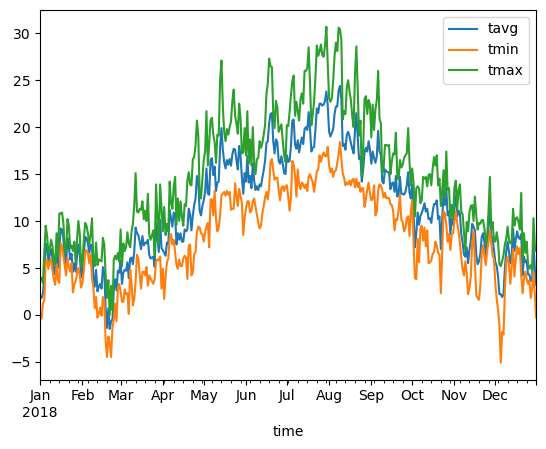

In [9]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [3]:
df = pd.read_csv("FLIGHTS.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",700,707.0,7.0,0.0,0.0,950.0,15.0,1.0,1.0,0.0,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",1830,1826.0,0.0,0.0,-1.0,2112.0,2.0,0.0,0.0,0.0,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,1080003,"Burbank, CA",1420,1426.0,6.0,0.0,0.0,1516.0,0.0,0.0,-1.0,0.0,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,1082106,"Baltimore, MD",1500,1514.0,14.0,0.0,0.0,2050.0,15.0,1.0,1.0,0.0,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,1125904,"Dallas, TX",530,527.0,0.0,0.0,-1.0,805.0,0.0,0.0,-1.0,0.0,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


## Explore the general distribution of delayed minutes due to weather

In [4]:
df[df['WEATHER_DELAY'] > 0.0] #95726 flights that were delayed due to the weather

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
849,2024,1,1,1,1,19393,11140,1114008,"Corpus Christi, TX",12191,1219103,"Houston, TX",700,813.0,73.0,1.0,4.0,913.0,73.0,1.0,4.0,0.0,NaN,60.0,60.0,187.0,0.0,73.0,0.0,0.0,0.0,849
3935,2024,1,1,1,1,19393,14908,1490803,"Santa Ana, CA",14831,1483106,"San Jose, CA",1030,1202.0,92.0,1.0,6.0,1311.0,81.0,1.0,5.0,0.0,NaN,80.0,69.0,342.0,0.0,81.0,0.0,0.0,0.0,3935
4385,2024,1,1,1,1,19690,14747,1474703,"Seattle, WA",12173,1217305,"Honolulu, HI",715,736.0,21.0,1.0,1.0,1202.0,32.0,1.0,2.0,0.0,NaN,375.0,386.0,2677.0,11.0,21.0,0.0,0.0,0.0,4385
5523,2024,1,1,1,1,19790,11603,1160302,"Eugene, OR",14747,1474703,"Seattle, WA",625,1418.0,473.0,1.0,12.0,1548.0,473.0,1.0,12.0,0.0,NaN,90.0,90.0,234.0,0.0,473.0,0.0,0.0,0.0,5523
5606,2024,1,1,1,1,19790,11884,1188402,"Spokane, WA",14747,1474703,"Seattle, WA",1005,1458.0,293.0,1.0,12.0,1607.0,266.0,1.0,12.0,0.0,NaN,96.0,69.0,224.0,0.0,266.0,0.0,0.0,0.0,5606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546571,2024,4,12,31,2,20436,11292,1129202,"Denver, CO",14107,1410702,"Phoenix, AZ",2220,2238.0,18.0,1.0,1.0,115.0,53.0,1.0,3.0,0.0,NaN,122.0,157.0,602.0,0.0,18.0,35.0,0.0,0.0,7546571
7546579,2024,4,12,31,2,20436,11292,1129202,"Denver, CO",14771,1477104,"San Francisco, CA",2225,2234.0,9.0,0.0,0.0,42.0,21.0,1.0,1.0,0.0,NaN,176.0,188.0,967.0,0.0,9.0,12.0,0.0,0.0,7546579
7546701,2024,4,12,31,2,20436,12953,1295304,"New York, NY",11298,1129806,"Dallas/Fort Worth, TX",2259,323.0,264.0,1.0,12.0,626.0,256.0,1.0,12.0,0.0,NaN,251.0,243.0,1389.0,0.0,256.0,0.0,0.0,0.0,7546701
7546884,2024,4,12,31,2,20436,14635,1463502,"Fort Myers, FL",11193,1119302,"Cincinnati, OH",1634,1714.0,40.0,1.0,2.0,1941.0,33.0,1.0,2.0,0.0,NaN,154.0,147.0,879.0,0.0,13.0,0.0,0.0,20.0,7546884


In [5]:
print(df['WEATHER_DELAY'].describe())
print('\n')
print(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].describe())

count    7.546988e+06
mean     9.005415e-01
std      1.585831e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.419000e+03
Name: WEATHER_DELAY, dtype: float64


count    95726.000000
mean        70.998224
std        121.862120
min          1.000000
25%         14.000000
50%         33.000000
75%         79.000000
max       2419.000000
Name: WEATHER_DELAY, dtype: float64


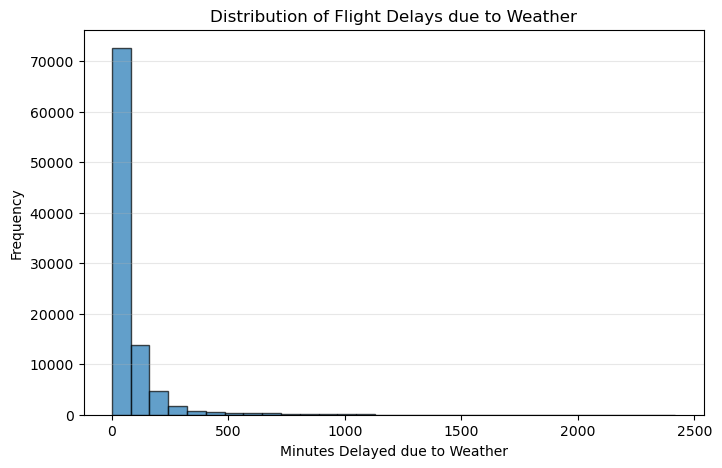

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].dropna(), bins=30, edgecolor='black', alpha=0.7)

plt.title('Distribution of Flight Delays due to Weather')
plt.xlabel('Minutes Delayed due to Weather')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Eliminating outliers

From the above histogram, we see that most of the delays are concentrated at very low minutes, but there are a few that are outliers (the max delayed minutes being 2419 minutes). To account for that, we can plot only the 99th quantile of values.

<Axes: xlabel='WEATHER_DELAY', ylabel='Count'>

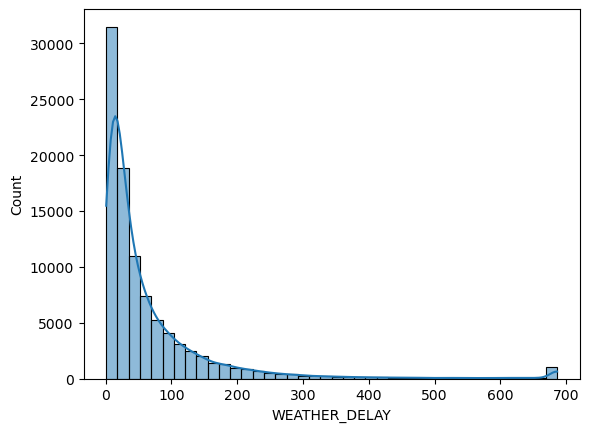

In [7]:
cap = df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].quantile(0.99)
sns.histplot(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].clip(upper=cap), bins=40, kde=True)